In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib as mpl

import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
#grid for PIs
x = np.linspace(0,35,50)
X,Y = np.meshgrid(x,x)

#meta-information
classes = ["Normal", "Diseased"]
IDs = [[ 77, 81,  82, 162, 163, 235, 236, 239, 240, 255],
       [  1,   2,   3,   4,   5,  44, 139, 291, 319, 324],] #Normals VSIs, then diseased VSIs

result_locations = ["../Results/all/",
                    "../Results/all/"]
im_headers = ["a","v"]

#initialize lists of entries
def initialize_dict(d):
    
    d['STARE1'] = {}
    d['STARE2'] = {}
    d['HRF'] = {}
    d['STARE1']['Normal'] = []
    d['STARE1']['Diseased'] = []
    d['STARE2']['Normal'] = []
    d['STARE2']['Diseased'] = []
    d['HRF']['Normal'] = []
    d['HRF']['Diseased'] = []
    
    return d
    
num_loops = {}
loops_size = {}
num_loops = initialize_dict(num_loops)
loops_size = initialize_dict(loops_size)

### Loop through STARE datasets

#i - dataset (STARE 1 / STARE 2)
for i in np.arange(2):
    # j - IDs (Normal / Diseased)
    for j in np.arange(2):
    
        for num in IDs[j]:

            num_str = str(num).zfill(4)

            #load in the persistence diagram for this dataset and ID
            PI_mat = np.load(f"{result_locations[i]}/DS1_im{im_headers[i]}{num_str}_flooding_persistence.npy",allow_pickle=True).item()

            
            num_loops_tmp = 0
            for dim, bd in PI_mat['BD']:

                if dim == 1 and  bd[0] == 0:

                    num_loops_tmp += 1
                    #record size of all loops in this VSI
                    loops_size[f"STARE{i+1}"][f"{classes[j]}"].append( (bd[1]-bd[0])/2.0 )
        
            #record total number of loops in the VSI
            num_loops[f"STARE{i+1}"][f"{classes[j]}"].append(num_loops_tmp)

In [3]:
#Now do the same for the HRF dataset

classes = ["Normal", "Diseased"]
IDs = [np.arange(1,16),np.arange(16,46)] #Normals VSIs, then diseased VSIs

result_locations = ["../Results/all/",
                    "../Results/all/"]

# j - VSI class (Normal / Diseased)
for j in np.arange(2):

    #num is each ID
    for num in IDs[j]:

        num_mod = ((num-1)%15)+1
        num_str = str(num_mod).zfill(2)
        
        if num < 16:
            im_footer = "_h"
        elif num < 31:
            im_footer = "_d"
        elif num < 46:
            im_footer = "_g"

        #Persistence diagram
        PI_mat = np.load(f"{result_locations[j]}/DS1_imh{num_str}{im_footer}_flooding_persistence.npy",allow_pickle=True).item()

        num_loops_tmp = 0

        for dim, bd in PI_mat['BD']:

            #looking at loops present in the initial VSI
            if dim == 1 and  bd[0] == 0:

                num_loops_tmp += 1
                #record size of all loops in this VSI                
                loops_size["HRF"][f"{classes[j]}"].append( (bd[1]-bd[0])/2.0 )

        #record total number of loops in the VSI        
        num_loops["HRF"][f"{classes[j]}"].append(num_loops_tmp)

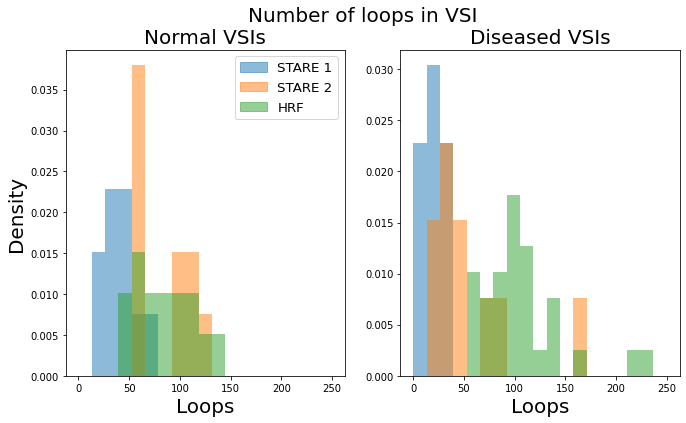

<Figure size 432x288 with 0 Axes>

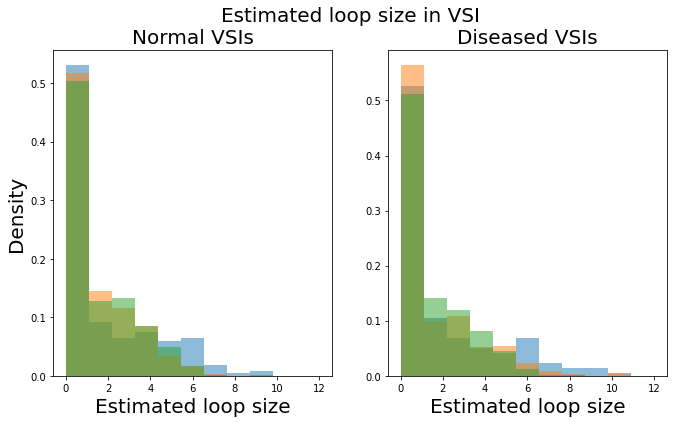

In [6]:
fig, axes = plt.subplots(1,2,figsize=(11,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fontsize=20

for key in list(num_loops.keys()):
    axes[0].hist(num_loops[key]['Normal'],alpha=0.5, density=True,bins=np.linspace(0,250,20))
    axes[0].set_xlabel("Loops",fontsize=fontsize)
    axes[0].set_title("Normal VSIs",fontsize=fontsize)

for key in list(num_loops.keys()):
    axes[1].hist(num_loops[key]['Diseased'],alpha=0.5, density=True,bins=np.linspace(0,250,20))
    axes[1].set_xlabel("Loops",fontsize=fontsize)
    axes[1].set_title("Diseased VSIs",fontsize=fontsize)

axes[0].set_ylabel("Density",fontsize=fontsize)    
plt.suptitle("Number of loops in VSI",fontsize=fontsize)
#create legend
handles = [Rectangle((0,0),1,1,color=c,alpha=0.5) for c in colors[:3]]
labels= ["STARE 1","STARE 2", "HRF"]
axes[0].legend(handles, labels, fontsize=fontsize*2/3)    

plt.savefig("../Figures/All_dataset_loop_number.pdf",format="pdf")    
    
plt.figure()
fig, axes = plt.subplots(1,2,figsize=(11,6))
for key in list(loops_size.keys()):
    axes[0].hist(loops_size[key]['Normal'],alpha=0.5,bins=np.linspace(0,12,12),density=True)
    axes[0].set_xlabel("Estimated loop size",fontsize=fontsize)
    axes[0].set_title("Normal VSIs",fontsize=fontsize)    

for key in list(loops_size.keys()):
    axes[1].hist(loops_size[key]['Diseased'],alpha=0.5,bins=np.linspace(0,12,12),density=True)
    axes[1].set_xlabel("Estimated loop size",fontsize=fontsize)
    axes[1].set_title("Diseased VSIs",fontsize=fontsize)
    
axes[0].set_ylabel("Density",fontsize=fontsize)    
plt.suptitle("Estimated loop size in VSI",fontsize=fontsize)
plt.savefig("../Figures/All_dataset_loop_size.pdf",format="pdf")                